### Artificial Neural Network for Multi-class Image Classification

This notebook demonstrates the use of TensorFlow for image classification using MNIST dataset. 
> From Wikipedia: "The MNIST database (Modified National Institute of Standards and Technology database[1]) is a large database of handwritten digits that is commonly used for training various image processing systems."

Since TensorFlow has a built-in MNIST dataset, we can directly use it.

In [1]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Install TensorFlow
import tensorflow as tf

# Other imports 
import numpy as np
import matplotlib.pyplot as plt

# check tf version
print(tf.__version__)

2.12.0


### Preparing the Data

In [3]:
# Load in the dataset
# Images - labels   Images - labels
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() # returns tuple of numpy arrays 

In [4]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


There are 60000 images in the dataset. They have the size of 28x28 pixels. 

In [5]:
print(y_train)
print(len(y_train))

[5 0 4 ... 5 6 8]
60000


Each label in the y_train corresponds to the actual number, which the algorithm should predict based on the X_train data.

In [6]:
X_train[0][7] 

array([  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
       253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
         0,   0], dtype=uint8)

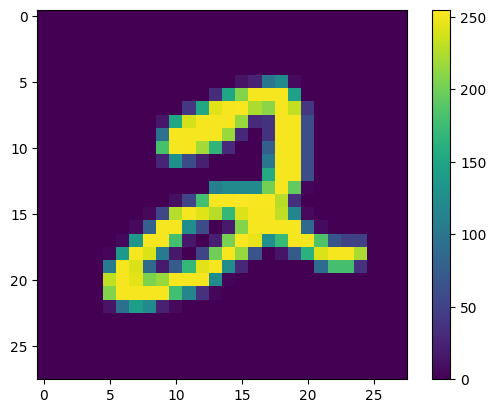

In [7]:
# Visualize an image using Matplotlib 
plt.figure() # Create a figure for the plot
plt.imshow(X_train[5]) # Display an image at index 5
plt.colorbar() # Add colorbar
plt.grid(False) # Remove grids for smooth representation
plt.show()

You can see that RGB values are between 0-255, so they need to be normalized before training. Here normalization refers to making all the values between 0-1.

In [8]:
# Split bu 255 to normalize 
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0][7] # see that now we have values between 0-1

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.19215686, 0.93333333, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.98431373, 0.36470588, 0.32156863,
       0.32156863, 0.21960784, 0.15294118, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

To verify that the data is ready for training, let's plot some with corresponding target values.

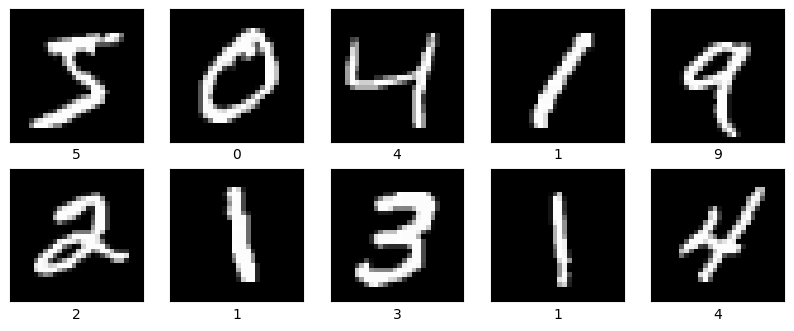

In [10]:
# Plot 10 of them to ensure image-label sets are correct
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap="gray")
    plt.xlabel(y_train[i])
plt.show()

### 2. Build & Compile the Model

In [11]:
# Create a  sequential model with Keras api
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In depth explanation: 
1.  Create a sequential model. The Sequential model is a linear stack of layers, where you can add layers one by one.
2. The Flatten layer transforms the input data into a 1-dimensional array. Remember we had two dimension (28x28) image shape.
3. Add Dense layer to the model.The Dense layer is a fully connected layer, meaning each neuron in the layer is connected to every neuron in the previous layer. The number 128 represents the number of neurons in this layer.The activation function is *ReLu(Rectified Linear Unit)* which introduces non-linearity into the model and helps the network learn complex patterns in the data.
4. Add a dropout layer to the model. Dropout is a regularization technique that randomly sets a fraction of input units to 0 during training. In this case, the fraction specified is 0.2, which means 20% of the input units will be randomly set to 0 at each update during training. It helps to prevent overfitting by reducing the dependency on specific input neurons.
5. Add another Dense layer to the model. This layer has 10 neurons, corresponding to the 10 possible classes in the classification task. The activation function used is softmax, which produces a probability distribution over the classes. Softmax ensures that the output values are between 0 and 1 and sum up to 1, allowing the model to make predictions for each class.


In [12]:
# Compile the model
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In depth explanation:

The compile() method configures the model for training by 
specifying the optimizer, loss function, and evaluation metric.
* *Adam* (short for Adaptive Moment Estimation) is a popular and effective optimization algorithm for deep learning. Adam adapts the learning rate for each parameter, providing faster convergence and handling sparse gradients efficiently.
* The loss function measures how well the model's predictions match the true labels or targets. The sparse categorical cross-entropy calculates the logarithmic loss between the predicted probability distribution and the true label distribution. It encourages the model to output high probabilities for the correct class and penalizes the deviations from it.


### Train & Evaluate the model

In [13]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2943 - accuracy: 0.9135 - val_loss: 0.1416 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1400 - accuracy: 0.9578 - val_loss: 0.0971 - val_accuracy: 0.9716
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1055 - accuracy: 0.9678 - val_loss: 0.0825 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0853 - accuracy: 0.9735 - val_loss: 0.0785 - val_accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0718 - accuracy: 0.9771 - val_loss: 0.0721 - val_accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0635 - accuracy: 0.9794 - val_loss: 0.0695 - val_accuracy: 0.9791
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0582 - accuracy: 0.9812 - val_loss: 0.0702 - val_accura

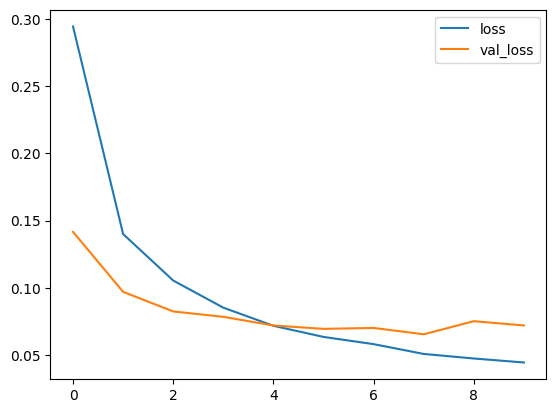

In [14]:
# Plot the loss per iteration 
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

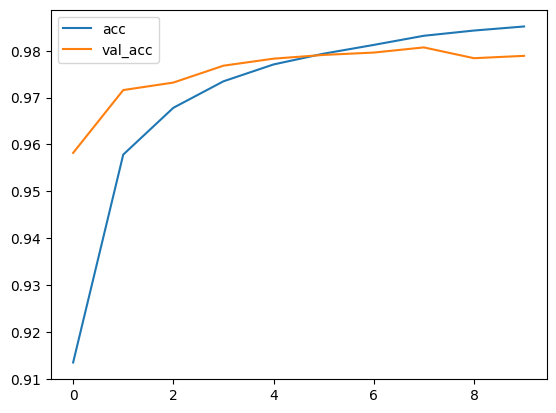

In [15]:
# Plot the accuracy for iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [16]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print('Validation Loss:', val_loss)
print('Validation Accuracy', val_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0721 - accuracy: 0.9789
Validation Loss: 0.07207474112510681
Validation Accuracy 0.9789000153541565


### Make Predictions with the Model

Since we already attached a final layer with a Softmax function, we can directly predict the probabilities.

In [17]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [18]:
print(predictions[0])
print(np.argmax(predictions[0]))

[2.4000377e-08 6.9127350e-11 3.5247956e-07 5.9828108e-05 1.6084747e-12
 1.3991876e-08 2.8756411e-13 9.9992973e-01 4.5599563e-08 9.9849494e-06]
7


In [19]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Display the image
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    # Set color based on prediction correctness
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    # Display the predicted label, prediction confidence, and true label
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label, 100 * np.max(predictions_array), true_label),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    # Highlight the predicted and true labels in the bar plot
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


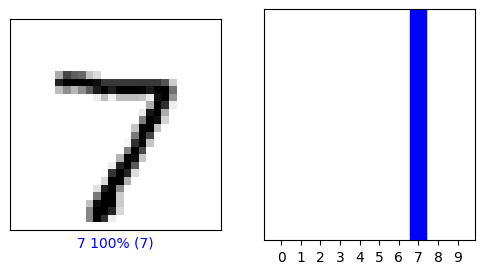

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

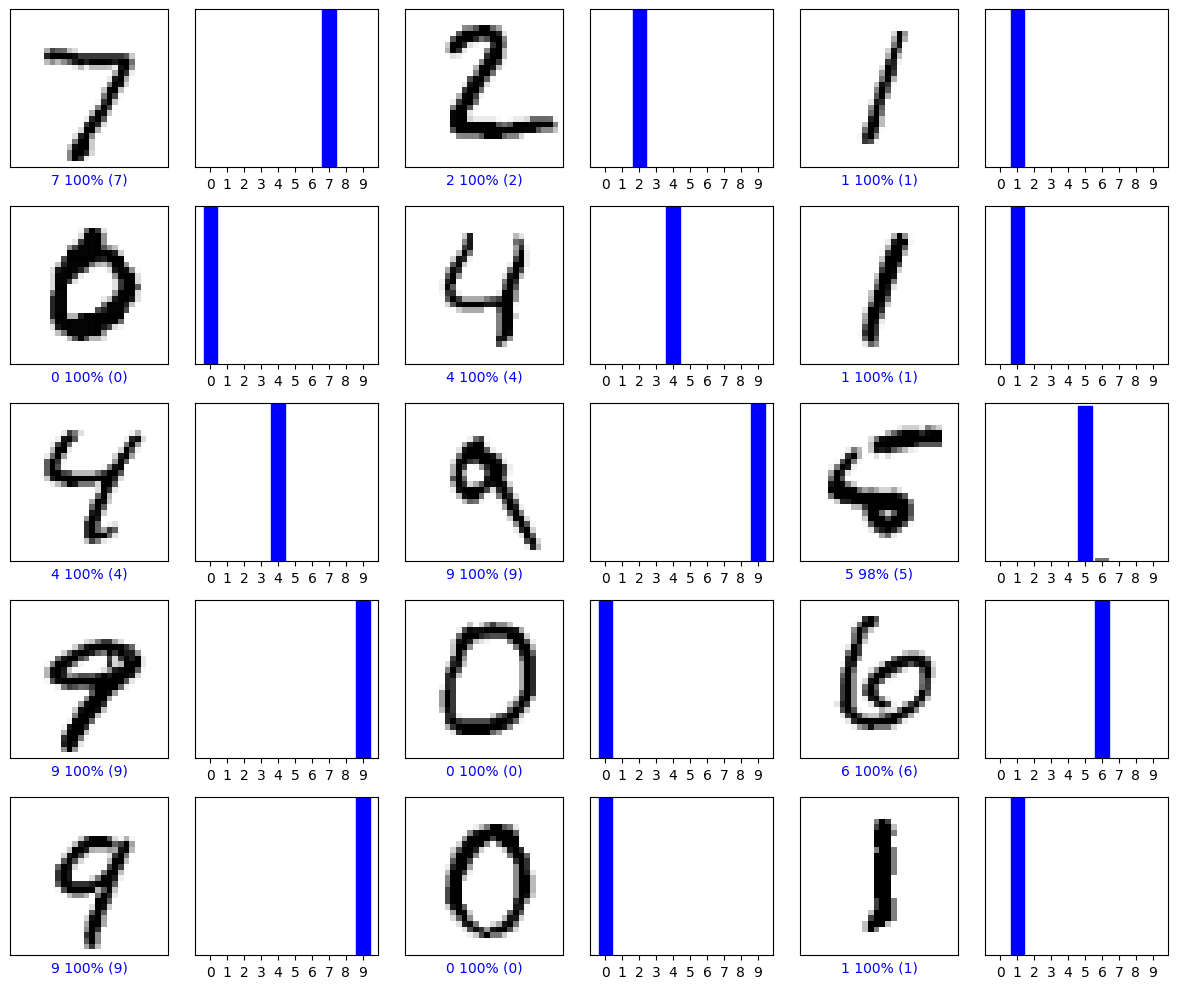

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

### Plot Confusion Matrix and Show Misclassified Examples


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 971    0    1    2    1    1    2    1    1    0]
 [   0 1123    3    1    0    1    3    0    4    0]
 [   8    3 1001    4    1    0    1    5    9    0]
 [   1    0    3  993    0    3    0    3    5    2]
 [   1    0    2    1  962    1    3    1    1   10]
 [   2    0    0   10    0  873    2    0    4    1]
 [   4    2    2    1    6    4  936    0    3    0]
 [   2    2    8    3    2    0    0  996    3   12]
 [   3    0    0    5    5    2    0    3  952    4]
 [   1    5    0    8    7    1    1    4    0  982]]


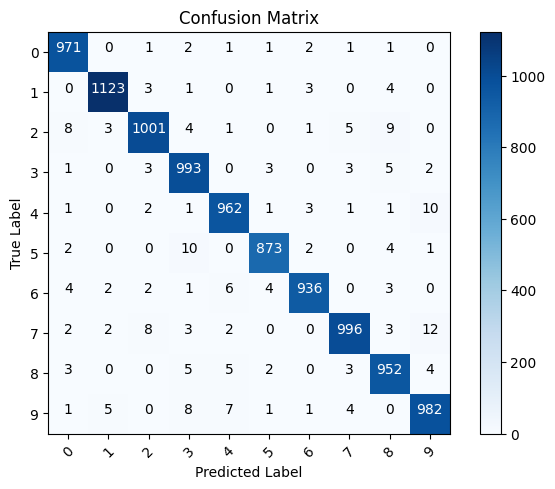

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    # Check if normalization is required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Print the confusion matrix
    print(cm)

    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Add text annotations to the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Set labels and display the plot
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Get predictions and compute confusion matrix
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)

# Plot the confusion matrix
plot_confusion_matrix(cm, list(range(10)))


You see that the errors actually make sense. The model confuses 2-7, 5-3, which can actually be confused by humans as well. You can check the example below.

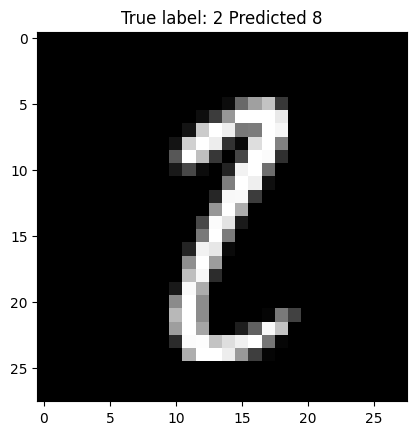

In [34]:
# Show some misclassified examples 
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title('True label: %s Predicted %s' % (y_test[i], p_test[i]));